# The first part of the assignment requires you to perform multivariate regression to estimate the pricing of house using the availability facility information as features.

**A peek into the dataset :**

 The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per \$10,000
* PTRATIO - pupil-teacher ratio by town
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT - % lower status of the population
* MEDV - Median value of owner-occupied homes in $1000's

MEDV is the dependent variable.


 Using this dataset, explain your understanding of linear regression. You should do some checks on the features and the dependent variable, get some plots and distributions for the given variables.

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

%matplotlib inline
from sklearn.datasets import fetch_california_housing

import seaborn as sns



In [27]:
# Load the dataset by calling the load_boston function
housing = fetch_california_housing()

In [28]:
# Find the keys of all features in the dataset
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [29]:
# Find the type of the data
data = housing.data
type(data)

# Fill

numpy.ndarray

In [30]:
# Find the shape of the data
data.shape


(20640, 8)

In [31]:
# Load the data into a pandas dataframe
data_df=pd.DataFrame(data=data,columns=housing.feature_names)
# Print the head of the dataframe to see how it is
data_df.head(2)
# Fill

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.02381,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.97188,2401.0,2.109842,37.86,-122.22


In [32]:
# sklearn datasets have the y value as boston.target. Load the y values as a new column data_df['PRICE']
# Fill
data_df['PRICE'] = (housing.target)

In [33]:
# Visualise the data frame using the .describe() function
data_df.describe()
# Fill

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [34]:
# Visualise the data frame using the .info() function
data_df.info()
# Fill

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   PRICE       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [35]:
# Create the train test split using sklearn function
X_train, X_test, y_train, y_test = train_test_split(data, data_df['PRICE'], test_size=0.2, random_state=42)


# Fill

In [36]:
# Load the Linear Regression model
model = LinearRegression()



# Fill

In [37]:
# Fit the loaded model using the train dataset

model.fit(X_train, y_train)

# Fill

LinearRegression()

In [38]:
# Predict the y values corresponding to test x values

y_pred = model.predict(X_test)
# Fill

In [39]:
from sklearn.metrics import mean_squared_error
mse_error = mean_squared_error(y_test, y_pred)
mse_error
# Find the mse error using the sklearn function between the test y values and predicted y values corresponding to test x values
# Fill

0.5558915986952416

# Second Part : Implementing Logistic Regression

Here you will have to implement a model to predict if a person will buy a product or not given their age.

In [41]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from math import exp
plt.rcParams["figure.figsize"] = (10, 6)

In [42]:
# Load the dataset using load_csv function and visualize the data
data = pd.read_csv('Social_Network_Ads.csv')
data.head(2)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0


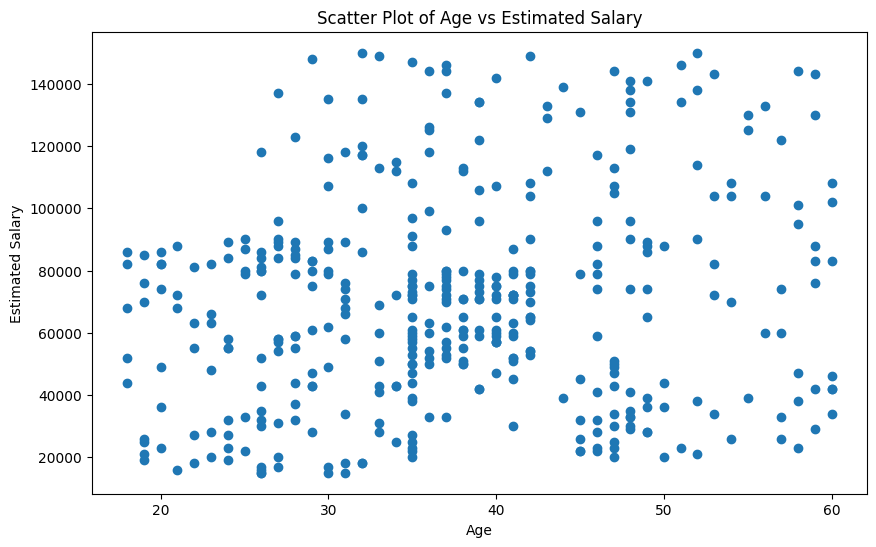

In [43]:
# Try plotting a scatter plot of the data
plt.scatter( x = data['Age'], y = data['EstimatedSalary'])
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('Scatter Plot of Age vs Estimated Salary')
plt.show()

In [44]:
# Create the train test split
X = data[['Age', 'EstimatedSalary']]
y = data['Purchased']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
# Import the logistic regression model from sklearn and initialize it
from sklearn.linear_model import LogisticRegression


logistic_regression_model = LogisticRegression()



In [46]:
# Fit the model using the training samples
logistic_regression_model.fit(X_train, y_train)

LogisticRegression()

In [47]:
# Predict the y values for test_x values
y_pred = logistic_regression_model.predict(X_test)

In [48]:
# Calculate the accuracy of the model using sklearn function
from sklearn.metrics import accuracy_score

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.65
